<a href="https://colab.research.google.com/github/Dheerajmishrajnv/MLdawn/blob/master/Malerial_Parasite_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dheerajmishra123","key":"d3d15a62512b8bbdc5adcfd1e0317182"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d miracle9to9/files1

 97% 511M/525M [00:06<00:00, 79.1MB/s]
100% 525M/525M [00:06<00:00, 85.9MB/s]


In [7]:
!ls


files1.zip  kaggle.json  sample_data


In [ ]:
!unzip files1.zip

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras

In [10]:
train_dir = '/content/Malaria Cells/training_set'
training_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,label_mode='int',batch_size=32,image_size=(180,180))

Found 27558 files belonging to 2 classes.


In [11]:
class_names = training_data.class_names
print(class_names)


['Parasitized', 'Uninfected']


In [12]:
for image_batch , labels_batch in training_data:
 print(image_batch.shape)
 print(labels_batch.shape)
 break


(32, 180, 180, 3)
(32,)


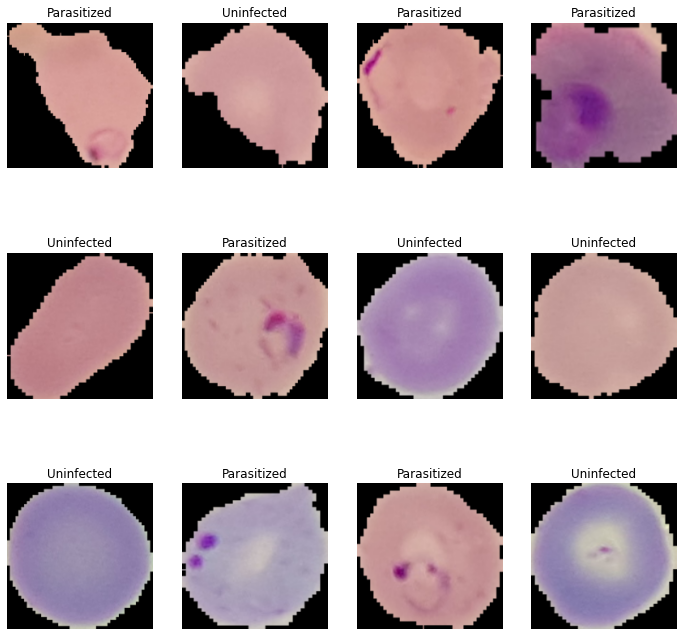

In [13]:
plt.figure(figsize=(12, 12))
for images, labels in training_data.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [14]:
test_dir = '/content/Malaria Cells/testing_set'
testing_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,label_mode='int',batch_size=32,image_size=(180,180),shuffle=True)

Found 15832 files belonging to 2 classes.


In [15]:
print(testing_data.class_names)

['Parasitized', 'Uninfected']


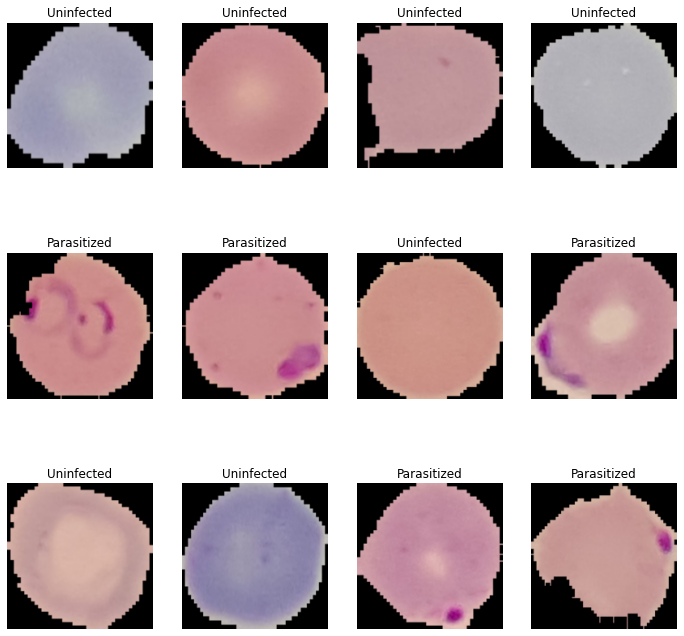

In [16]:
plt.figure(figsize=(12,12))
for images,labels in testing_data.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

    

In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = training_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = testing_data.cache().prefetch(buffer_size=AUTOTUNE)


In [18]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,preprocessing
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten

In [20]:
num_classes = 2

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_data = training_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)


In [24]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))


In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [28]:
history = model.fit(
  train_data,
  validation_data=testing_data,
  epochs=5
)

Epoch 1/5
862/862 [==============================] - 946s 1s/step - loss: 3.1906 - accuracy: 0.7343 - val_loss: 0.2167 - val_accuracy: 0.9345
Epoch 2/5
862/862 [==============================] - 950s 1s/step - loss: 0.2082 - accuracy: 0.9346 - val_loss: 0.1538 - val_accuracy: 0.9487
Epoch 3/5
862/862 [==============================] - 954s 1s/step - loss: 0.1594 - accuracy: 0.9464 - val_loss: 0.1148 - val_accuracy: 0.9563
Epoch 4/5
862/862 [==============================] - 952s 1s/step - loss: 0.1316 - accuracy: 0.9552 - val_loss: 0.0850 - val_accuracy: 0.9677
Epoch 5/5
862/862 [==============================] - 949s 1s/step - loss: 0.1170 - accuracy: 0.9592 - val_loss: 0.0820 - val_accuracy: 0.9735


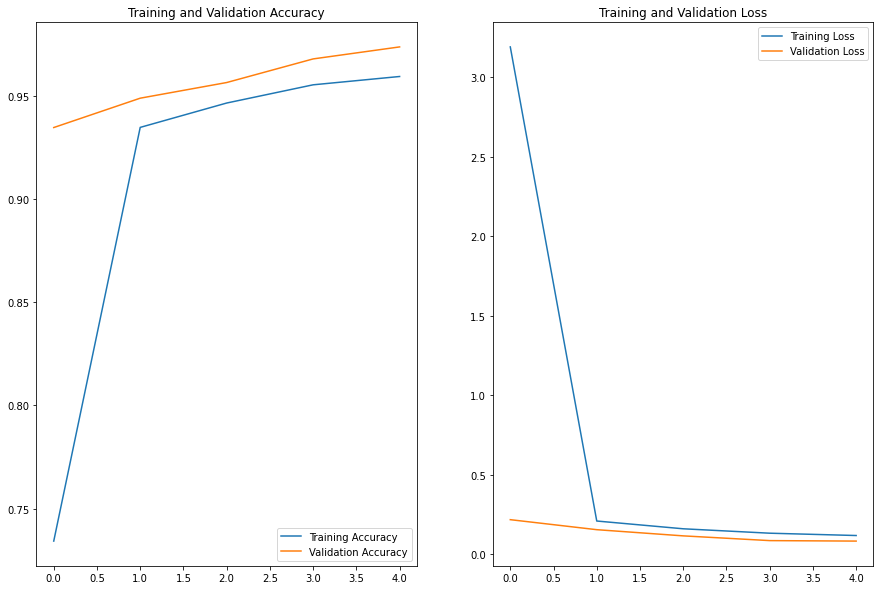

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [74]:
y_pred=model.evaluate(testing_data)

495/495 [==============================] - 184s 372ms/step - loss: 0.0820 - accuracy: 0.9735


In [63]:
test_dir='/content/Malaria Cells/single_prediction/Parasitised.png'
img = keras.preprocessing.image.load_img(
    test_dir, target_size=(180,180)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Parasitized with a 99.99 percent confidence.


In [64]:
test_dir='/content/Malaria Cells/single_prediction/Uninfected.png'
img = keras.preprocessing.image.load_img(
    test_dir, target_size=(180,180)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Uninfected with a 97.16 percent confidence.
